In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('abalone.data', header=-1)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()

In [9]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
# X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.836 0.088]


In [13]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
1,0.373,-0.073
2,0.374,-0.045
3,0.336,0.074
4,0.379,-0.136
5,0.364,-0.295
6,0.369,-0.171
7,0.371,0.050
8,0.242,0.922


In [14]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.transform(X_train_sc)

array([[-2.90218146e-01,  4.44276403e-01, -1.68797436e-01, ...,
         5.73217549e-02, -1.09005793e-01, -8.96479409e-03],
       [-1.81483035e+00, -2.36234287e-01, -2.79839346e-01, ...,
         1.97065999e-01,  7.89376901e-02, -4.26233041e-03],
       [-4.18948504e+00, -1.69304845e-04, -3.50495748e-01, ...,
         1.53840304e-03,  7.54804676e-03,  9.28207772e-03],
       ...,
       [-8.15511071e-01,  5.72061136e-01, -5.96026013e-02, ...,
        -4.12813843e-02,  1.39911914e-02, -4.36446511e-02],
       [ 6.82762199e-01, -6.90443954e-01, -6.48520588e-01, ...,
         1.84568510e-01, -1.41276117e-01,  6.37000234e-02],
       [ 1.12889025e+00, -1.57161130e+00,  2.68986644e-01, ...,
         1.39584516e-01, -9.03668792e-02,  8.58953007e-02]])

In [16]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.836 0.088 0.035 0.021 0.011 0.008 0.002 0.001]


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.83612669, 0.92368399, 0.95829304, 0.9792597 , 0.99001022,
       0.99777291, 0.99929894, 1.        ])

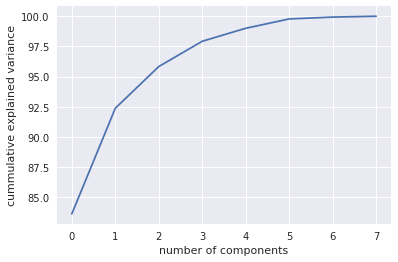

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');